<a href="https://colab.research.google.com/github/brendhaed/Faculdade-ADS/blob/main/L%C3%B3gica%20e%20Programa%C3%A7%C3%A3o%20de%20Computadores/aula_10_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Casos Confirmados =  23157.0
Casos de obitos =  523.0
Cidade com mais casos novos:   Porto Alegre 
Cidade com menor mortalidade:   Teutônia 
Media de novos obitos: 0.06


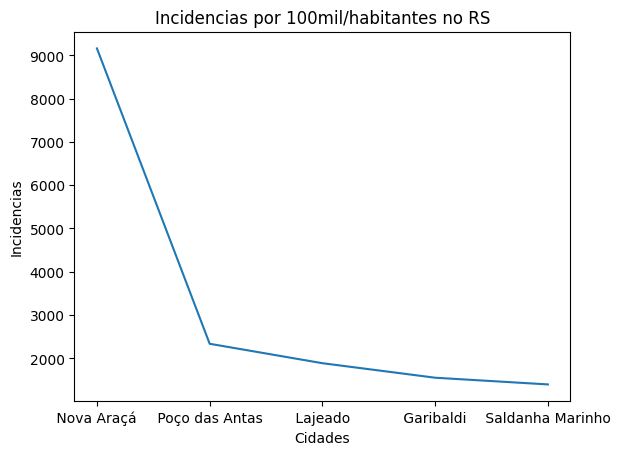

In [ ]:
#Problema 3: Faça um programa em Python que processe o arquivo disponibilizado com dados do RS sobre o virus COVID-19, calcule e escreva:
# a) total de casos confirmados no RS (atuais e novos)
# b) total de óbitos no RS (atuais e novos)
# c) cidade com mais novos casos no RS
# d) cidade com menor mortalidade no RS
# e) média de novos óbitos no RS
# f) gráfico de barras com a incidência dos casos no RS (5 cidades com maior incidencia)

import matplotlib.pyplot as plt

#Leitura do arquivo
def cargaDados(nome):
  arquivo = open(nome,"r")
  dados = []
  for linha in arquivo:
    #print(linha)
    linha1 = linha[:-1]  #retira \n
    linha2 = linha1[1:len(linha1)] #substring 1 ate o final para cortar a virgula (,)
    dados.append(linha2)
  arquivo.close()
  return dados

#Escreve os dados de uma lista
def escreveLista(lista):
  for item in lista:
    print(item)

#Transformando e estruturando os dados em tuplas
def transformaDados(linha):
  itens = linha.split(',')
  itensTransformados = [itens[0]] #Municipio foi colocado na lista
  cont = 1
  while cont < len(itens):
    itensTransformados.append(float(itens[cont])) #converte para float demais itens
    cont = cont + 1
  return itensTransformados

#Lista de lista com os dados
def transformaLista(lista):
  listaDeItens = []
  cont = 1             #pula o cabecalho
  while cont< len(lista):
    listaDeItens.append(transformaDados(lista[cont]))
    cont = cont + 1
  return listaDeItens

# a) Casos confirmados
def totalConfirmados(lista):
  confirmados = 0
  novosConfirmados = 0
  for item in lista:
    #print(item[1], item[2])
    confirmados = confirmados + item[1]
    novosConfirmados = novosConfirmados + item[2]
  return (confirmados + novosConfirmados)

# b) Casos de obitos
def totalObitos(lista):
  obitos = 0
  novosObitos = 0
  for item in lista:
   # print(item[4], item[5])
    obitos = obitos + item[4]
    novosObitos = novosObitos + item[5]
  return (obitos + novosObitos)

# c) Cidade com mais casos novos
def cidadeComMaisNovosCasos(lista):
  cidade = lista[0][0]
  maisNovosCasos = lista[0][2]
  for item in lista:
    if item[2]> maisNovosCasos:
      maisNovosCasos = item[2]
      cidade = item[0]
  return cidade


# d) Cidade com menor mortalidade
def cidadeComMenorMortalidade(lista):
  cidade = lista[0][0]
  menor = lista[0][6]
  for item in lista:
    if item[6]<menor:
      menor = item[6]
      cidade = item[0]
  return cidade


# e) Media de novos obitos
def mediaNovosObitos(lista):
  soma = 0
  for item in lista:
    soma = soma + item[5]
  return soma/len(lista)

#Busca as maiores incidencias
def trataIncidencias(lista, quantidade):
  cidades = []
  incidencias = []
  for item in lista:
    cidades.append(item[0])
    incidencias.append(item[3])
  #print("Antes da ordenacao")
  #print(cidades)
  #print(incidencias)
  ordenaPorIncidencia(cidades,incidencias)
  #print("Apos a ordenacao")
  #print(cidades)
  #print(incidencias)
  geraGrafico(cidades,incidencias,quantidade)

#Bubblet sort
def ordenaPorIncidencia(cidades,incidencias):
  for i in range(0,len(incidencias)-1):
    for j in range(0,len(incidencias)-1-i):
      if incidencias[j]<incidencias[j+1]:  #decrescente
        aux = incidencias[j]
        incidencias[j] = incidencias[j+1]
        incidencias[j+1] = aux
        aux = cidades[j]
        cidades[j] = cidades[j+1]
        cidades[j+1] = aux

# f) Graficos de incidencias
def geraGrafico(cidades,incidencias, quantidade):
  cidades2 = []
  incidencias2 = []
  ind = 0
  while ind<quantidade:
    cidades2.append(cidades[ind])
    incidencias2.append(incidencias[ind])
    ind = ind+1
  plt.plot(cidades2,incidencias2) #plot é para gráfico de linhas
  plt.title("Incidencias por 100mil/habitantes no RS")
  plt.xlabel("Cidades")
  plt.ylabel("Incidencias")
  plt.show()

dadosBrutos = cargaDados('SESRS - Coronavírus_v1.csv')
#escreveLista(dadosBrutos)
cabecalho = dadosBrutos[0].split(',')
#print(cabecalho)
dados = transformaLista(dadosBrutos)
#escreveLista(dados)

print("Casos Confirmados = ", totalConfirmados(dados))
print("Casos de obitos = ", totalObitos(dados))
print("Cidade com mais casos novos: ", cidadeComMaisNovosCasos(dados))
print("Cidade com menor mortalidade: ", cidadeComMenorMortalidade(dados))
media = mediaNovosObitos(dados)
print(f'Media de novos obitos: {media:,.2f}')

trataIncidencias(dados,5)